In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l


In [3]:
def synthetic_data(w, b, num_examples):
    x = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(x, w) + b 
    y += torch.normal(0, 0.01, y.shape)
    return x , y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)



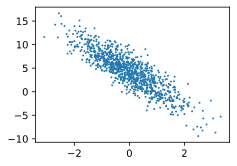

In [5]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [6]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(0,num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
batch_size = 10

for X, y in data_iter(batch_size=batch_size, features=features, labels=labels):
    print(X, '\n', y)
    break


tensor([[-0.7514, -2.5982],
        [-0.4303,  1.5634],
        [-0.5725, -0.8027],
        [-0.9706,  1.6022],
        [-0.4784, -1.8593],
        [ 0.9643,  1.0840],
        [ 2.1312,  0.0360],
        [ 1.3356,  0.2081],
        [-0.1624,  0.0066],
        [ 0.4165, -0.7497]]) 
 tensor([[11.5299],
        [-1.9797],
        [ 5.7922],
        [-3.1881],
        [ 9.5630],
        [ 2.4277],
        [ 8.3329],
        [ 6.1659],
        [ 3.8561],
        [ 7.5830]])


In [16]:
w = torch.normal(0, 1, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [17]:
def linreg(x, w, b):
    return torch.matmul(x,w)+b

In [18]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2/2

In [19]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [20]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b),y)
        l.sum().backward()
        sgd([w,b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch +1}, loss {float(train_l.mean()):f}')
        

epoch 1, loss 0.025349
epoch 2, loss 0.000098
epoch 3, loss 0.000050


In [21]:
print(f'w 误差：{true_w-w.reshape(true_w.shape)}')
print(f'b 误差：{true_b-b}')

w 误差：tensor([3.6359e-04, 6.2227e-05], grad_fn=<SubBackward0>)
b 误差：tensor([-0.0001], grad_fn=<RsubBackward1>)
